## **TrainEmotionDetector**

In [35]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [4]:
# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [5]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [6]:
cv2.ocl.setUseOpenCL(False)

In [7]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

C:\Users\sarah\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/20


C:\Users\sarah\AppData\Local\Temp\ipykernel_33436\1401183085.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


448/448 [==============================] - 267s 597ms/step - loss: 1.6048 - accuracy: 0.3764 - val_loss: 1.5344 - val_accuracy: 0.4113
Epoch 2/20
448/448 [==============================] - 304s 678ms/step - loss: 1.5258 - accuracy: 0.4142 - val_loss: 1.4499 - val_accuracy: 0.4441
Epoch 3/20
448/448 [==============================] - 280s 624ms/step - loss: 1.4460 - accuracy: 0.4447 - val_loss: 1.3966 - val_accuracy: 0.4611
Epoch 4/20
448/448 [==============================] - 248s 555ms/step - loss: 1.3865 - accuracy: 0.4729 - val_loss: 1.3425 - val_accuracy: 0.4929
Epoch 5/20
448/448 [==============================] - 238s 532ms/step - loss: 1.3326 - accuracy: 0.4944 - val_loss: 1.2906 - val_accuracy: 0.5095
Epoch 6/20
448/448 [==============================] - 190s 424ms/step - loss: 1.2830 - accuracy: 0.5150 - val_loss: 1.2670 - val_accuracy: 0.5174
Epoch 7/20
448/448 [==============================] - 235s 525ms/step - loss: 1.2520 - accuracy: 0.5313 - val_loss: 1.2398 - val_accura

In [11]:
# Fit Model 
with tf.device('/GPU:0'):
   results = emotion_model.fit(train_generator,epochs=10, validation_data=validation_generator)

Epoch 1/10
449/449 [==============================] - 136s 302ms/step - loss: 0.8903 - accuracy: 0.6716 - val_loss: 1.0707 - val_accuracy: 0.6014
Epoch 2/10
449/449 [==============================] - 162s 362ms/step - loss: 0.8718 - accuracy: 0.6781 - val_loss: 1.0706 - val_accuracy: 0.5997
Epoch 3/10
449/449 [==============================] - 164s 364ms/step - loss: 0.8458 - accuracy: 0.6902 - val_loss: 1.0660 - val_accuracy: 0.6032
Epoch 4/10
449/449 [==============================] - 164s 366ms/step - loss: 0.8202 - accuracy: 0.6971 - val_loss: 1.0657 - val_accuracy: 0.6043
Epoch 5/10
449/449 [==============================] - 153s 340ms/step - loss: 0.8010 - accuracy: 0.7064 - val_loss: 1.0615 - val_accuracy: 0.6101
Epoch 6/10
449/449 [==============================] - 245s 547ms/step - loss: 0.7766 - accuracy: 0.7151 - val_loss: 1.0759 - val_accuracy: 0.6067
Epoch 7/10
449/449 [==============================] - 272s 607ms/step - loss: 0.7512 - accuracy: 0.7241 - val_loss: 1.0677 -

In [12]:
# history from 10 epochs that were ran by a model (loss, accuracy, validation loss, validation accuracy)
results.history

{'loss': [0.8902531862258911,
  0.8718112707138062,
  0.845807671546936,
  0.8202067017555237,
  0.8009607791900635,
  0.7765637636184692,
  0.751177966594696,
  0.7256880402565002,
  0.7070697546005249,
  0.6818624138832092],
 'accuracy': [0.6715664267539978,
  0.6781497001647949,
  0.690236508846283,
  0.6970636248588562,
  0.7064335346221924,
  0.7151067852973938,
  0.7241283059120178,
  0.7383747100830078,
  0.7395938634872437,
  0.7509492039680481],
 'val_loss': [1.070707082748413,
  1.0705677270889282,
  1.0659929513931274,
  1.0656888484954834,
  1.0615111589431763,
  1.0758674144744873,
  1.0677090883255005,
  1.0720486640930176,
  1.0717191696166992,
  1.0704197883605957],
 'val_accuracy': [0.6014209985733032,
  0.5997492074966431,
  0.6032320857048035,
  0.6043466329574585,
  0.6100584864616394,
  0.6067149639129639,
  0.6129841208457947,
  0.6100584864616394,
  0.6139593124389648,
  0.6146559119224548]}

In [13]:
# we get the dictionary 'history'
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy with epochs')

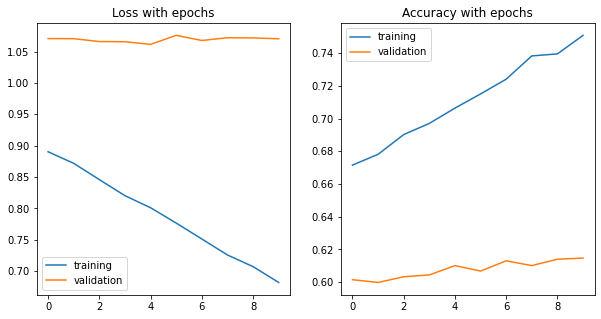

In [14]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(results.history['loss'],label='training')
ax[0].plot(results.history['val_loss'],label='validation')
ax[0].legend()
ax[0].set_title('Loss with epochs')

ax[1].plot(results.history['accuracy'],label='training')
ax[1].plot(results.history['val_accuracy'],label='validation')
ax[1].legend()
ax[1].set_title('Accuracy with epochs')

In [15]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [16]:
# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

# **TestEmotionDetector**

In [17]:
import cv2
import numpy as np
from keras.models import model_from_json

In [18]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [19]:
# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [20]:
# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
# you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
cap = cv2.VideoCapture("pexels-gabby-k-5273028.mp4")


while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step


KeyboardInterrupt: 

# **EvaluateEmotionDetector**

In [28]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [29]:
# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [30]:
# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [31]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

In [32]:
# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [33]:
# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

C:\Users\sarah\AppData\Local\Temp\ipykernel_33436\3003485560.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[111  13 106 277 182 148 121]
 [ 12   0  18  31  18  19  13]
 [117  10 139 239 191 214 114]
 [177  28 237 467 328 341 196]
 [135  14 163 331 200 228 162]
 [128  16 158 335 220 261 129]
 [107   5  94 212 143 170 100]]


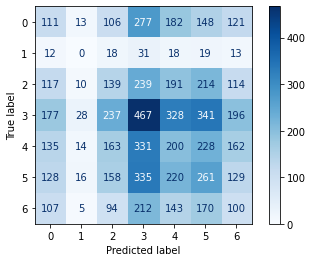

In [36]:
# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [37]:
# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.12      0.13       958
           1       0.00      0.00      0.00       111
           2       0.15      0.14      0.14      1024
           3       0.25      0.26      0.25      1774
           4       0.16      0.16      0.16      1233
           5       0.19      0.21      0.20      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.18      7178

